# Spam Email classification
Classify spam emails

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [3]:
input_df=pd.read_csv('data/emails.csv')

In [55]:
input_df.iloc[:,-1].to_csv('sampley.csv')

In [56]:
len(input_df.columns)

3002

In [57]:
len(input_df)

5172

In [6]:
if True in input_df.isnull().any().values:
    print('yes')

In [7]:
input_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
the,5172.0,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,3.075599,6.045970,0.0,0.0,1.0,3.0,89.0
for,5172.0,3.124710,4.680522,0.0,1.0,2.0,4.0,47.0
...,...,...,...,...,...,...,...,...
military,5172.0,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,0.004060,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


In [8]:
numeric_df=input_df.iloc[:,1:]

In [9]:
numeric_df.dtypes

the           int64
to            int64
ect           int64
and           int64
for           int64
              ...  
military      int64
allowing      int64
ff            int64
dry           int64
Prediction    int64
Length: 3001, dtype: object

### Check for any feature dependencies

In [10]:
corr_df=numeric_df.corr()

In [11]:
corr_df.head(2)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,1.000000,0.852715,0.337249,0.841200,0.784112,0.796397,0.784451,0.471392,0.303621,0.845670,...,0.008926,0.075479,0.225586,0.223426,0.101768,0.129466,0.127019,0.341878,0.051021,-0.004421
to,0.852715,1.000000,0.375480,0.825474,0.781971,0.752722,0.896466,0.508513,0.347993,0.881759,...,0.013250,0.101247,0.232847,0.255793,0.093322,0.091639,0.120059,0.406666,0.071388,0.055277


In [12]:
corr_df['Prediction'].describe()

count    3001.000000
mean        0.020873
std         0.071619
min        -0.271433
25%        -0.030295
50%         0.015840
75%         0.068911
max         1.000000
Name: Prediction, dtype: float64

In [16]:
selected_indexs = corr_df['Prediction'][corr_df['Prediction'].abs()>0.01].index.values

In [17]:
selected_in_df = input_df[selected_indexs]

In [18]:
selected_in_df

,to,ect,and,of,a,you,hou,in,on,is,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,Prediction
0,0,1,0,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,13,24,6,2,102,1,27,18,21,13,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,8,0,0,4,2,0,...,0,0,0,0,0,0,0,0,0,0
3,5,22,0,1,51,2,10,1,5,9,...,0,0,0,0,0,0,0,0,0,0
4,6,17,1,2,57,0,9,3,12,2,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,3,0,32,0,0,5,6,1,...,0,0,0,0,0,0,0,0,0,0
5168,27,11,2,5,151,4,3,23,18,6,...,0,0,0,0,0,0,0,0,1,0
5169,0,1,1,0,11,0,0,1,1,3,...,0,0,0,0,0,0,0,0,0,1
5170,7,1,0,1,28,2,0,8,11,7,...,0,0,0,0,0,0,0,0,1,1


### split the data into train and test data

In [19]:
X = selected_in_df.iloc[:,0:2716]
y = selected_in_df.iloc[:,-1].values

In [20]:
y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=5)

In [25]:
rfc = RandomForestClassifier(n_estimators=100,random_state=4)

rfc.fit(X_train,y_train)

print("Train Results \n")
y_train_pred  = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]

print("Confusion Matrix for Train : \n", confusion_matrix(y_train, y_train_pred))
print("Accuracy Score for Train : ", accuracy_score(y_train, y_train_pred))
print("ROC AUC for Train : ", roc_auc_score(y_train, y_train_prob))

print("+"*50)
print("Test Results \n")
y_test_pred  = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]

print("Confusion Matrix for Test : \n", confusion_matrix(y_test, y_test_pred))
print("Accuracy Score for Test : ", accuracy_score(y_test, y_test_pred))
print("ROC AUC for Test : ", roc_auc_score(y_test, y_test_prob))

Train Results 

Confusion Matrix for Train : 
 [[2782    0]
 [   0 1097]]
Accuracy Score for Train :  1.0
ROC AUC for Train :  1.0
++++++++++++++++++++++++++++++++++++++++++++++++++
Test Results 

Confusion Matrix for Test : 
 [[879  11]
 [ 30 373]]
Accuracy Score for Test :  0.9682907965970611
ROC AUC for Test :  0.996562299606881


### overfitting issue
Since Accuracy and the ROC for train data is 1, this is a overfitting scenario. Therefore need to find a better parameters using Randomized Search

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state=4)



params = {'n_estimators': sp_randint(50,400),
          'max_features' : sp_randint(2,16),
          'max_depth' : sp_randint(2,10),
          'min_samples_split' : sp_randint(2,25),
          'min_samples_leaf' : sp_randint(1,25),
          'criterion':['gini','entropy']}
rsearch = RandomizedSearchCV(rfc,
                             param_distributions=params,
                             n_iter=50,
                             cv=3, 
                             return_train_score = True,
                             scoring='roc_auc',
                             n_jobs=-1,
                            random_state=5)

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021640DD8EB0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021640D33370>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021640D1C880>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021640BFD2B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021640CBC430>},
                   random_state=5, return_train_score=True, scoring='roc_auc')

In [43]:
rsearch.q

17

In [27]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 13,
 'min_samples_leaf': 6,
 'min_samples_split': 11,
 'n_estimators': 230}

In [28]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

rfc = RandomForestClassifier(**rsearch.best_params_,random_state=4,oob_score=True)
rfc.fit(X_train,y_train)

print("Train Results \n")
y_train_pred  = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]

print("Confusion Matrix for Train : \n", confusion_matrix(y_train, y_train_pred))
print("Accuracy Score for Train : ", accuracy_score(y_train, y_train_pred))
print("ROC AUC for Train : ", roc_auc_score(y_train, y_train_prob))
print("OOB Score for Train : ", rfc.oob_score_)

print("+"*50)
print("Test Results \n")
y_test_pred  = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]


print("Confusion Matrix for Test : \n", confusion_matrix(y_test, y_test_pred))
print("Accuracy Score for Test : ", accuracy_score(y_test, y_test_pred))
print("ROC AUC for Test : ", roc_auc_score(y_test, y_test_prob))

Train Results 

Confusion Matrix for Train : 
 [[2782    0]
 [ 726  371]]
Accuracy Score for Train :  0.8128383604021655
ROC AUC for Train :  0.9845936273491458
OOB Score for Train :  0.802784222737819
++++++++++++++++++++++++++++++++++++++++++++++++++
Test Results 

Confusion Matrix for Test : 
 [[887   3]
 [289 114]]
Accuracy Score for Test :  0.774168600154679
ROC AUC for Test :  0.9753701173780913


In [29]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_prob)
thresholds[0] = thresholds[0]-1

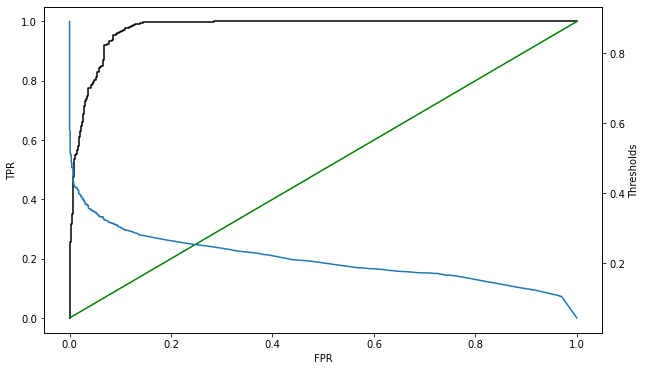

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(fpr,tpr,'black')
ax.plot(fpr,fpr,'green')
ax1=ax.twinx()
ax1.plot(fpr,thresholds)
ax1.set_ylabel("Thresholds")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
plt.show()

## Second iteration with X varibles with higher correlation (corr > 0.1)
This will reduce the number of X varibles which will be used to train the model

In [33]:
selected_indexs = corr_df['Prediction'][corr_df['Prediction'].abs()>0.1].index.values
selected_in_df = input_df[selected_indexs]

In [34]:
selected_in_df

,ect,and,of,a,you,hou,in,is,enron,i,...,formula,corel,tm,constitutes,porn,symbol,reform,plain,ff,Prediction
0,1,0,0,2,0,0,0,1,0,2,...,0,0,1,0,0,0,0,0,0,0
1,24,6,2,102,1,27,18,13,1,61,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,8,0,0,4,0,0,8,...,0,0,0,0,0,0,0,0,0,0
3,22,0,1,51,2,10,1,9,0,16,...,0,0,0,0,0,0,0,0,0,0
4,17,1,2,57,0,9,3,2,0,30,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,3,0,32,0,0,5,1,0,20,...,0,0,0,0,0,0,0,0,0,0
5168,11,2,5,151,4,3,23,6,1,98,...,0,0,0,0,0,0,0,0,1,0
5169,1,1,0,11,0,0,1,3,0,10,...,0,0,0,0,0,0,0,0,0,1
5170,1,0,1,28,2,0,8,7,0,39,...,0,0,0,0,0,0,0,0,1,1


In [35]:
X = selected_in_df.iloc[:,0:491]
y = selected_in_df.iloc[:,-1].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=5)
rfc = RandomForestClassifier(n_estimators=100,random_state=4)

rfc.fit(X_train,y_train)

print("Train Results \n")
y_train_pred  = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]

print("Confusion Matrix for Train : \n", confusion_matrix(y_train, y_train_pred))
print("Accuracy Score for Train : ", accuracy_score(y_train, y_train_pred))
print("ROC AUC for Train : ", roc_auc_score(y_train, y_train_prob))

print("+"*50)
print("Test Results \n")
y_test_pred  = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]

print("Confusion Matrix for Test : \n", confusion_matrix(y_test, y_test_pred))
print("Accuracy Score for Test : ", accuracy_score(y_test, y_test_pred))
print("ROC AUC for Test : ", roc_auc_score(y_test, y_test_prob))

Train Results 

Confusion Matrix for Train : 
 [[2782    0]
 [   0 1097]]
Accuracy Score for Train :  1.0
ROC AUC for Train :  1.0
++++++++++++++++++++++++++++++++++++++++++++++++++
Test Results 

Confusion Matrix for Test : 
 [[873  17]
 [ 30 373]]
Accuracy Score for Test :  0.9636504253673627
ROC AUC for Test :  0.995516770290239


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state=4)



params = {'n_estimators': sp_randint(50,400),
          'max_features' : sp_randint(2,16),
          'max_depth' : sp_randint(2,10),
          'min_samples_split' : sp_randint(2,25),
          'min_samples_leaf' : sp_randint(1,25),
          'criterion':['gini','entropy']}
rsearch = RandomizedSearchCV(rfc,
                             param_distributions=params,
                             n_iter=50,
                             cv=3, 
                             return_train_score = True,
                             scoring='roc_auc',
                             n_jobs=-1,
                            random_state=5)

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002164161BD60>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021640DFD850>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021640CCF700>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021640CCFFD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000216412CC790>},
                   random_state=5, return_train_score=True, scoring='roc_auc')

In [39]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 13,
 'min_samples_leaf': 6,
 'min_samples_split': 11,
 'n_estimators': 230}

In [40]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

rfc = RandomForestClassifier(**rsearch.best_params_,random_state=4,oob_score=True)
rfc.fit(X_train,y_train)

print("Train Results \n")
y_train_pred  = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]

print("Confusion Matrix for Train : \n", confusion_matrix(y_train, y_train_pred))
print("Accuracy Score for Train : ", accuracy_score(y_train, y_train_pred))
print("ROC AUC for Train : ", roc_auc_score(y_train, y_train_prob))
print("OOB Score for Train : ", rfc.oob_score_)

print("+"*50)
print("Test Results \n")
y_test_pred  = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]


print("Confusion Matrix for Test : \n", confusion_matrix(y_test, y_test_pred))
print("Accuracy Score for Test : ", accuracy_score(y_test, y_test_pred))
print("ROC AUC for Test : ", roc_auc_score(y_test, y_test_prob))

Train Results 

Confusion Matrix for Train : 
 [[2761   21]
 [ 290  807]]
Accuracy Score for Train :  0.9198246970868781
ROC AUC for Train :  0.9903091694425749
OOB Score for Train :  0.9033255993812839
++++++++++++++++++++++++++++++++++++++++++++++++++
Test Results 

Confusion Matrix for Test : 
 [[880  10]
 [130 273]]
Accuracy Score for Test :  0.8917246713070379
ROC AUC for Test :  0.9850308082638637


In [41]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_prob)
thresholds[0] = thresholds[0]-1

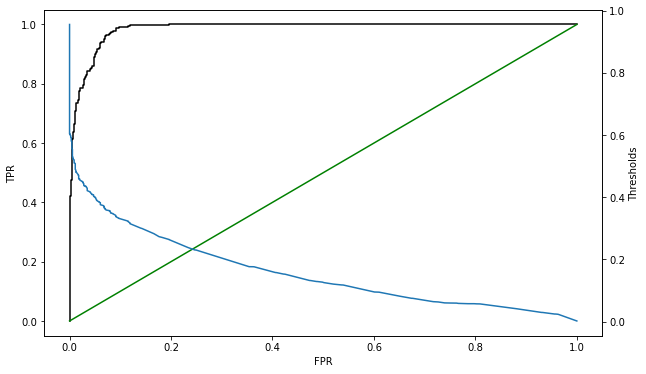

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(fpr,tpr,'black')
ax.plot(fpr,fpr,'green')
ax1=ax.twinx()
ax1.plot(fpr,thresholds)
ax1.set_ylabel("Thresholds")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
plt.show()

## Save the model for future use

In [45]:
import pickle

save_file = 'model_rfc_best.pickle'
pickle.dump(rfc, open(save_file, 'wb'))